In [1]:
!git clone https://github.com/qbeer/small-projects

Cloning into 'small-projects'...
remote: Enumerating objects: 109, done.
remote: Counting objects: 100% (109/109), done.
remote: Compressing objects: 100% (61/61), done.
remote: Total 109 (delta 45), reused 106 (delta 45), pack-reused 0
Receiving objects: 100% (109/109), 6.35 MiB | 32.99 MiB/s, done.
Resolving deltas: 100% (45/45), done.


In [2]:
!cp small-projects/style-transfer/* .
!wget -O tubingen.jpg https://upload.wikimedia.org/wikipedia/commons/0/00/Tuebingen_Neckarfront.jpg

cp: -r not specified; omitting directory 'small-projects/style-transfer/output'
--2019-05-19 07:19:30--  https://upload.wikimedia.org/wikipedia/commons/0/00/Tuebingen_Neckarfront.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.153.240, 2620:0:860:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.153.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 406531 (397K) [image/jpeg]
Saving to: ‘tubingen.jpg’

tubingen.jpg        100%[===================>] 397.00K  --.-KB/s    in 0.08s   

2019-05-19 07:19:30 (4.65 MB/s) - ‘tubingen.jpg’ saved [406531/406531]



Iter 1 : loss 238571575312384.00, style_score 238571575312384.00, content_score 0.00


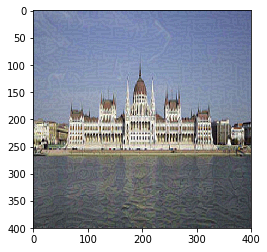

Iter 101 : loss 4831753797632.00, style_score 4351553175552.00, content_score 480200523776.00


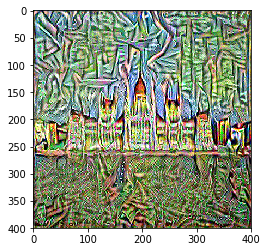

Iter 201 : loss 2093364543488.00, style_score 1641564995584.00, content_score 451799482368.00


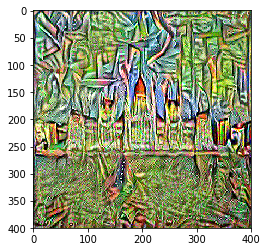

Iter 301 : loss 1261927268352.00, style_score 861672177664.00, content_score 400255057920.00


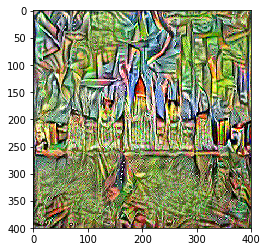

Iter 401 : loss 889820413952.00, style_score 535712595968.00, content_score 354107785216.00


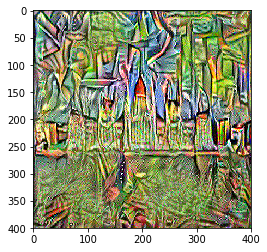

Iter 501 : loss 700496740352.00, style_score 383479119872.00, content_score 317017653248.00


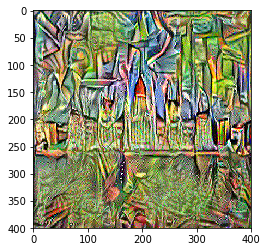

Iter 601 : loss 592490790912.00, style_score 303044231168.00, content_score 289446592512.00


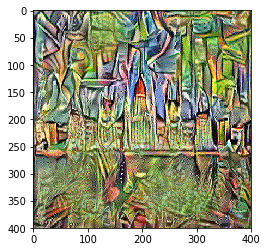

Iter 701 : loss 523983585280.00, style_score 254481825792.00, content_score 269501759488.00


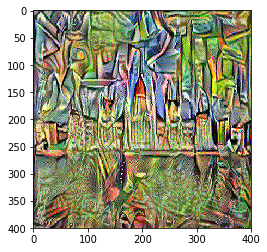

Iter 801 : loss 476859400192.00, style_score 222960680960.00, content_score 253898719232.00


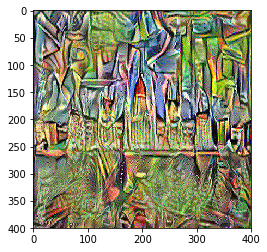

Iter 901 : loss 442339557376.00, style_score 200975122432.00, content_score 241364418560.00


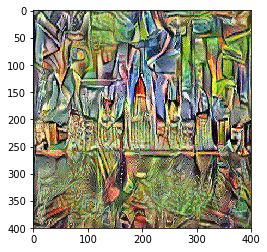

-123.68 151.061
0 255


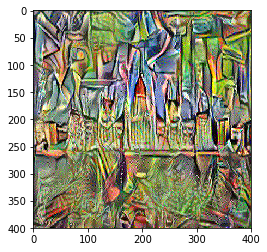

In [5]:
import tensorflow as tf
tf.enable_eager_execution()

import matplotlib.pyplot as plt
import os
from model import TransferModel
import numpy as np

model = TransferModel(os.getcwd() + "/hun_parliament.jpg")

model.style_transfer(os.getcwd() + "/hun_parliament.jpg", os.getcwd() + "/picasso.jpeg")

img = model.initial_image.numpy()[0]

print(np.min(img), np.max(img))

img[:,:,0] += 103.939
img[:,:,1] += 116.779
img[:,:,2] += 123.68

img = img[:,:,::-1]
img = np.clip(img, 0, 255).astype('uint8')

print(np.min(img), np.max(img))

plt.imshow(img)
plt.show()

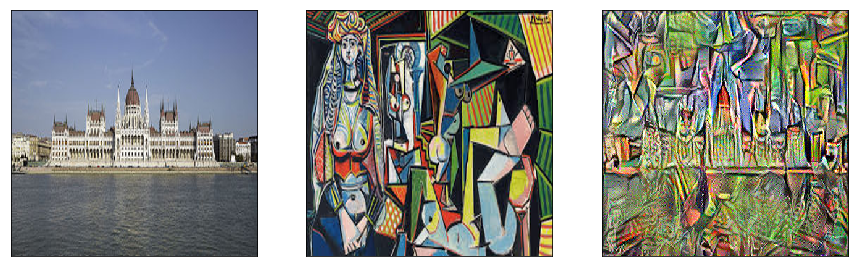

In [6]:
from preprocess import Preprocessor

prep = Preprocessor()

fig, axes = plt.subplots(1, 3, figsize=(15, 12))

axes[0].imshow(prep.load('hun_parliament.jpg')[0].astype('uint8'))
axes[1].imshow(prep.load('picasso.jpeg')[0].astype('uint8'))
axes[2].imshow(img)

axes[0].set_xticks([])
axes[0].set_yticks([])

axes[1].set_xticks([])
axes[1].set_yticks([])

axes[2].set_xticks([])
axes[2].set_yticks([])


plt.savefig('hun_picasso.png')
plt.show()